## 머신 러닝
- '러닝' 즉 학습은 '데이터'에서 '규칙'을 스스로 찾아내는 것.
    - 학습 혹은 훈련
        - 지도(supervised) 학습, 비지도(unsupervised) 학습, 강화(reinforcement) 학습
    - 데이터에는 입력과 타겟으로 구성되어 있음.
        - 입력은 일종의 문제. 타겟은 맞춰야 할 정답. x가 입력, y가 타겟
        - 비지도 학습은 타겟이 없는 데이터를 사용. 예를 들어 클러스터링
    - 규칙은 가중치와 절편.
    - 사실 내가 관심있는 것은 강화 학습.
        - Q-learning, SARSA, DQN(Deep Q Network)
- 딥러닝은 머신 러닝의 일종. 스케일업 한것.

<function matplotlib.pyplot.show(close=None, block=None)>

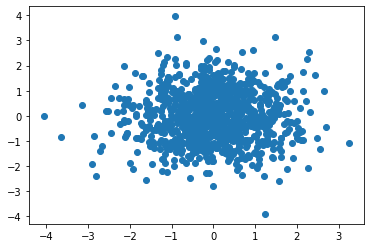

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)
plt.show

In [9]:
# 사이킷런에서 당뇨병 환자 데이터 가져오기. 이럴거면 코랩에서 하는게 낫지 않나?
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.size)
print(diabetes.data[:3], diabetes.target[:3])

(442, 10) 442
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]] [151.  75. 141.]


In [10]:
# tensor slicing test
testx = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print(testx[1:-1,-1])

[ 8 12]


In [11]:
x = diabetes.data[:, 2]
y = diabetes.target
print(type(x))

<class 'numpy.ndarray'>


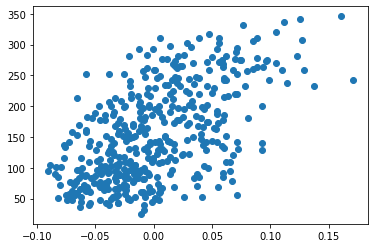

In [12]:
plt.scatter(x, y)
plt.show()

In [13]:
w = 1.0
b = 1.0

y_hat = x[0] * w +b
print(y_hat)
print(y[0])

1.0616962065186886
151.0


In [14]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [15]:
# w의 변화량 대비 y(예측값) 변화량
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


## 변화율
$$
\begin{aligned}
\hat{y} &= w \times x + b\\
\\
\hat{y}_\text{inc} &= w_\text{inc} \times x + b\\
\\
w_\text{rate} &= \frac{\hat{y}_\text{inc} - \hat{y}}{w_\text{inc} - w}\\
&= \frac{(x_0 \times 
w_\text{inc} + b) - (x_0 \times w + b)}{w_\text{inc} - w}\\
&= \frac{x_0 \times (w_\text{inc} - w)}{w_\text{inc} - w} = x_0
\end{aligned}
$$

- $w\_rate$는 첫 번째 훈련 데이터 $x[0]$에 대한 변화율이라고 함.
- 변화율은 결국 $x[0]$과 같다. 당연하지. 거기 곱해지는 값이니.
- b 역시 마찬가지. b의 변화율은 1이다. b가 변한만큼 그대로 더해지니.

## 오차 역전파

In [16]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [17]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [18]:
w = 1
b = 1
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

print(w, b)

587.8654539985689 99.40935564531424


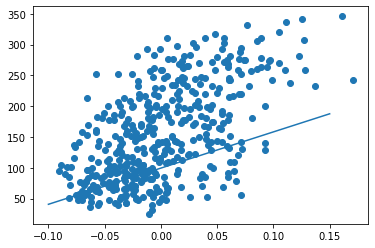

In [19]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])

In [20]:
for i in range(100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err

print(w, b)

913.5973364345905 123.39414383177204


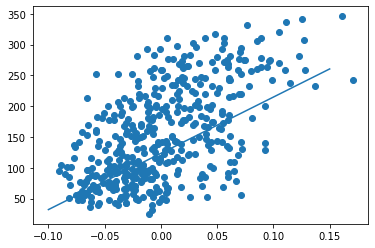

In [21]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])

## 비용 함수와 경사 하강법 관계
- 제곱 오차 $\text{SE} = (y - \hat{y})^2$

### 가중치 w에 대해 제곱 오차 미분
$$\begin{aligned}
\frac{\partial{\text{SE}}}{\partial{w}} &= \frac{\partial{}}{\partial{w}}(y - \hat{y})^2\\
&= 2(y - \hat{y})(- \frac{\partial{}}{\partial{w}}\hat{y})\\
&= 2(y - \hat{y})(-x)\\
&= -2(y - \hat{y})x\\
&= 2(\hat{y} - y)x
\end{aligned}$$

### 가중치, 절편 업데이트
- 결과에는 차이가 없으므로 그냥 $(\hat{y} - y)x$를 사용한다.
- 변화율을 빼야 비용 함수의 낮은 쪽으로 이동할 수 있음.
$$
w = w - \frac{\partial{\text{SE}}}{\partial{w}} = w - (\hat{y} - y)x\\
= w + (y - \hat{y}) x
$$
- 즉, 오차 역전파에서 해봤던 err 사용과 동일함.
    - 변화량은, 변화율 곱하기 타겟에서 예측치를 뺀 값.
    - 타겟보다 예측치가 크면 변화량이 음수(작아져야 하니까), 작으면 양수(커져야 하니까)
    - 뭐... 약간 급하게 끼워맞춘 느낌이긴 하지만.
- 절편에 대해서도 동일하게 해준다. 이번에는 처음부터 제곱오차에 $\frac{1}{2}$를 해준다.
$$\begin{aligned}
\frac{\partial{\text{SE}}}{\partial{b}} &= \frac{\partial{}}{\partial{b}}\frac{1}{2}(y - \hat{y})^2\\
&= (y - \hat{y})(- \frac{\partial{}}{\partial{b}}\hat{y})\\
&= (y - \hat{y})(-1)\\
&= -(y - \hat{y})\\
&= (\hat{y} - y)
\end{aligned}$$
- 절편도 변화율을 빼준다.
$$
b = b - \frac{\partial{\text{SE}}}{\partial{b}} = b - (\hat{y} - y)\\
= b + (y - \hat{y})
$$
- 역시 위에서 했던 것과 마찬가지.

### 그레디언트(gradient, 경사)
- 앞으로는 편미분을 사용.
- 이쪽 바닥에서는 변화율을 그레디언트라 부른다.
    - '그레디언트'가 전파된다 등등

## 선형 회귀를 위한 유닛(뉴런) 제작

In [22]:
class Unit:
    # Neuron이라고들 하지만 요즘은 Unit을 더 즐겨 쓴다고.
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
        
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x_set, y_set, epochs = 100):
        for i in range(epochs):
            for x_i, y_i in zip(x_set, y_set):
                y_hat = self.forpass(x_i)
                err = - (y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

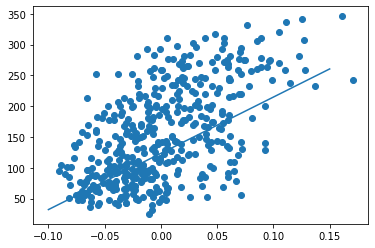

In [23]:
unit = Unit()
unit.fit(x, y, 100)

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * unit.w + unit.b)
pt2 = (0.15, 0.15 * unit.w + unit.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()

## 로지스틱 회귀
- 입력은 다항인데 출력은 바이너리.
- 중간에 유닛(뉴런?)을 하나 더 둬서 계단 함수로 만든다.
    - $ z = b + \sum_{i=1}^{n}{w_i x_i} $ : 다항을 먼저 $z$로 만들어주고,
    - 이 $z$를 활성화(activation) 함수를 통과시켜서 $a$로 만들어준 다음,
    - 마지막 단계에서 임계(threshold) 함수를 사용하여 $\hat{y}$를 구한다.
- 활성화에 사용되는 비선형 함수는 보통 아래와 같다.
    - $$ p = \frac{1}{1 + e^{-z}}
- 시그모이드 함수 형성 과정
    - odds ratio -> logit function -> sigmoid function
- odds ratio
    - $$ \text{OR(odds ratio)} = \frac{p}{1-p} (p=\text{성공 확률}) $$
    - p가 1에 가까워질수록 무한대로 올라감.
- logit function
    - $$ \text{logit}(p) = \log{(\frac{p}{1-p})} $$
    - 로그는 지수의 역함수. 즉, 어떤 수를 나타내기 위해 고정된 밑(자연로그는 $e$)을 몇 번 거듭제곱 해야 하는지를 구하는 함수.
    - $p$가 0.5일때 0이 되고, p가 0과 1일때 각각 무한대로 음 / 양의 방향으로 발산한다.
- sigmoid function
    - logit function의 x, y 축을 서로 바꾸면 원하는 모양이 나온다. 즉, logit function의 역함수를 구하면 된다.
    - $$\begin{aligned} \log{(\frac{p}{1-p})} &= z \\ \frac{p}{1-p} &= e^z \\ p &= e^z(1-p) \\ &= e^z - e^z p \\ p(1 + e^z) &= e^z \\ p &= \frac{e^z}{1 + e^z} \times \frac{e^{-z}}{e^{-z}} \\ &= \frac{1}{1 + e^{-z}}  \end{aligned}$$
- 시그모이드를 activation function로 사용하면 되는데, 손실(비용) 함수를 어떻게 만들어야 될지?
    - 선형 회귀에서는 $\text{MSE} = \frac{1}{2} (y - \hat{y})^2$를 사용했다.
- 로지스틱 손실 함수
    - 다중 분류를 위한 손실 함수인 cross entropy 손실 함수를 이진 분류 버전으로 만든 것.
        - ???
    - $$ L = -(y\log(a) + (1 - y)\log(1-a)) $$
    - $a$는 activation function의 결과값이고, $y$는 타겟. 타겟은 0 또는 1이므로, 0인 경우(음성)는 $ -\log(1-a) $가 되고, 1인 경우(양성)는 $ -\log(a) $가 된다.
    - 위 두 식의 값을 최소로 만드는 것이 목표.
        - $a$는 양성인 경우 1에 가까워지고, 음성인 경우 0에 가까워진다.
### 로지스틱 손실 함수 미분
$$\begin{aligned}
\frac{\partial{}}{\partial{w_i}}L &= -(y - a)x_i \\
\frac{\partial{}}{\partial{b}}L &= -(y - a)1
\end{aligned}$$
유도 과정
$$\begin{aligned}
y &= f(u), u = g(x) \\
y &= f(g(x)) \\
\\
\frac{\partial{y}}{\partial{x}} &= \frac{\partial{y}}{\partial{u}} \times \frac{\partial{u}}{\partial{x}} \\
\\
z &= b + \sum_{i=1}^{n}{w_i x_i} \\
a &= \frac{1}{1 + e^{-z}} \\
L &= -(y\log(a) + (1 - y)\log(1-a)) \\
\\
\frac{\partial{L}}{\partial{w_i}} &= \frac{\partial{L}}{\partial{a}} \times \frac{\partial{a}}{\partial{z}} \times \frac{\partial{z}}{\partial{w_i}} \\
\\
\frac{\partial{L}}{\partial{a}} &= \frac{\partial{}}{\partial{a}}(-(y\log(a) + (1-y)\log(1-a))) \\
&= -(y \frac{\partial{}}{\partial{a}}\log(a) - (1-y)\frac{\partial{}}{\partial{a}}\log(1-a)) \\
&= -(y\frac{1}{a} + (1-y)\frac{1}{1-a}) \\
\\
\frac{\partial{a}}{\partial{z}} &= \frac{\partial{}}{\partial{z}} \frac{1}{1 + e^{-z}} \\
&= \frac{\partial{}}{\partial{z}} (1 + e^{-z})^{-1} \\
&= -(1 + e^{-z})^{-2}\frac{\partial{}}{\partial{z}}(e^{-z}) = -(1 + e^{-z})^{-2} (-e^{-z}) \\
&= \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1}{1+e^{-z}} \times \frac{e^{-z}}{1+e^{-z}} = \frac{1}{1+e^{-z}}(1 - \frac{1}{1+e^{-z}}) \\
&= a(1-a) \\
\\
\frac{\partial{z}}{\partial{w_i}} &= x_i \\
\\
\frac{\partial{L}}{\partial{w_i}} &= -(\frac{y}{a} - \frac{1-y}{1-a}) \times a(1-a) \times x_i \\
&= -(y(1-a) - (1-y)a)x_i \\
&= -(y-a)x_i
\end{aligned}$$

### 가중치, 절편 업데이트
$$\begin{aligned}
w_{\text{next}} &= w_i + (y-a)x_i \\
b_{\text{next}} &= b + (y-a)1
\end{aligned}$$

In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(type(cancer))
print(cancer.data.shape, cancer.target.shape)
cancer.data[:3]

<class 'sklearn.utils.Bunch'>
(569, 30) (569,)


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

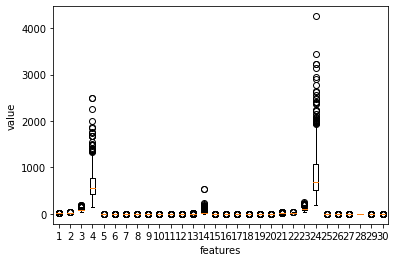

In [26]:
plt.boxplot(cancer.data)
plt.xlabel('features')
plt.ylabel('value')
plt.show()

In [28]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [60]:
def get_value_ratio(target, value = 1):
    target_summary = np.unique(target, return_counts=True)
    ratio = target_summary[1][value] / (target_summary[1][0] + target_summary[1][1])
    return ratio


In [61]:
print(get_value_ratio(cancer.target))

0.6274165202108963


In [69]:
x = np.array(cancer.data, dtype='long')
y = cancer.target

## 로지스틱 회귀를 위한 유닛(뉴런) 제작


### 훈련 세트, 테스트 세트
- 훈련된 모델의 실전 성능을 일반화 성능(generalization performance)라고 함.
- 일반화 성능의 신뢰도를 높이기 위해 훈련 세트와 테스트 세트로 데이터를 구분한다.
    - 테스트 세트보다 훈련 세트가 많아야 함.
    - 타겟의 값 비중이 편중되지 않도록 고르게 섞어야 함.
- `sklearn.model_selection.train_test_split()` 함수
    - `stratify` : 값 비중을 동일하게 만든다.
    - `test_size` : 테스트셋 비중을 설정한다. 기본값은 0.25(3:1)
    - `random_state` : 랜던 시드값. 결과를 동일하게 보장하려면 설정한다.

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    stratify = y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)
print(x_train.shape, x_test.shape)
print(get_value_ratio(y_train))
print(get_value_ratio(y_test))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(426, 30) (143, 30)
0.6267605633802817
0.6293706293706294
(array([0, 1]), array([159, 267]))
(array([0, 1]), array([53, 90]))


In [78]:
class LogisticUnit:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad
            #print(self.w)
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5
                

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
unit = LogisticUnit()
unit.fit(x_train, y_train)
np.mean(unit.predict(x_test) == y_test)

0.8251748251748252

In [111]:
class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0], 1)), x]   # 텐서의 맨 앞에 1로 채워진 열 벡터를 추가한다.
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for e in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            # indexes = range(len(x))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = - (y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                a = np.clip(a, 1e-10, 1-1e-10)
                
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))    # 각 에포크에서 평균 손실을 구하기 위해 다 더해줌
            self.losses.append(loss / len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

0.9300699300699301


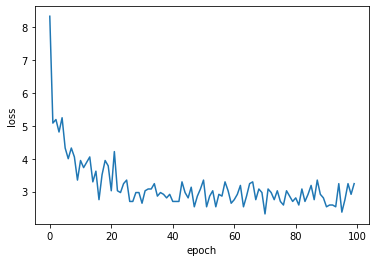

In [112]:

sl = SingleLayer()
sl.fit(x_train, y_train)
print(sl.score(x_test, y_test))

plt.plot(sl.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### skleran으로 로지스틱 회귀 수행
- Stochastic Gradient Descent Classifier 사용

In [116]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'log', 
                    max_iter = 100, 
                    tol = 1e-3, 
                    random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.916083916083916